In [1]:
pip install seaborn matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import dependencies 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
df = pd.read_csv("apartments_for_rent_classified_10K.csv", sep=";", encoding='cp1252') 
df1 = df

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      10000 non-null  object 
 5   bathrooms      10000 non-null  float64
 6   bedrooms       10000 non-null  int64  
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   7585 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        10000 non-null  object 
 16  cityname       10000 non-null  object 
 17  state          10000 non-null  object 
 18  latitud

Figure(1000x400)


<Axes: xlabel='price_display'>

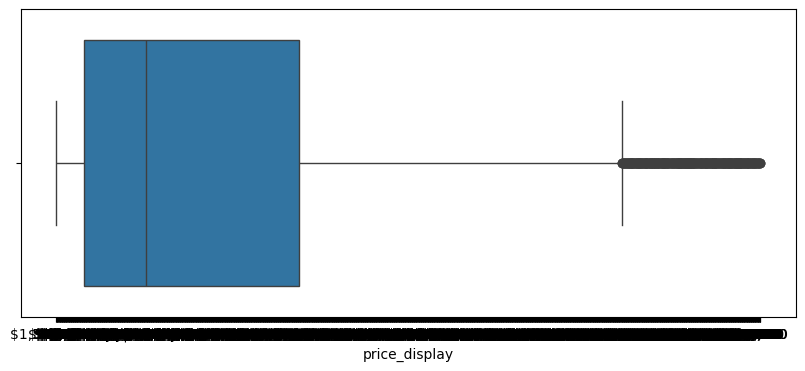

In [5]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "price_display", data = df1) 

Figure(1000x400)


<Axes: xlabel='bedrooms'>

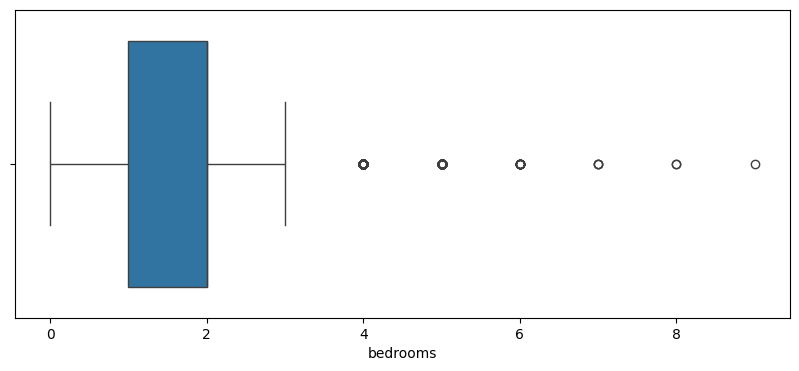

In [6]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "bedrooms", data = df1) 

In [7]:
# finding IQR
percentile25 = df1['bedrooms'].quantile(0.25)
percentile75 = df1['bedrooms'].quantile(0.75)
iqr = percentile75 - percentile25

In [8]:
# finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [9]:
# finding outliers using iqr
df1[df1['bedrooms'] > upper_limit]
df1[df1['bedrooms'] < lower_limit]

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time


In [10]:
# trimming outliers
new_df = df1[df1['bedrooms'] < upper_limit]
new_df.shape

(9479, 22)

C:\Users\MANAS\AppData\Local\Temp\ipykernel_19692\1857431015.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['bedrooms'])
C:\Users\MANAS\AppData\Local\Temp\ipykernel_19692\1857431015.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['bedrooms'])


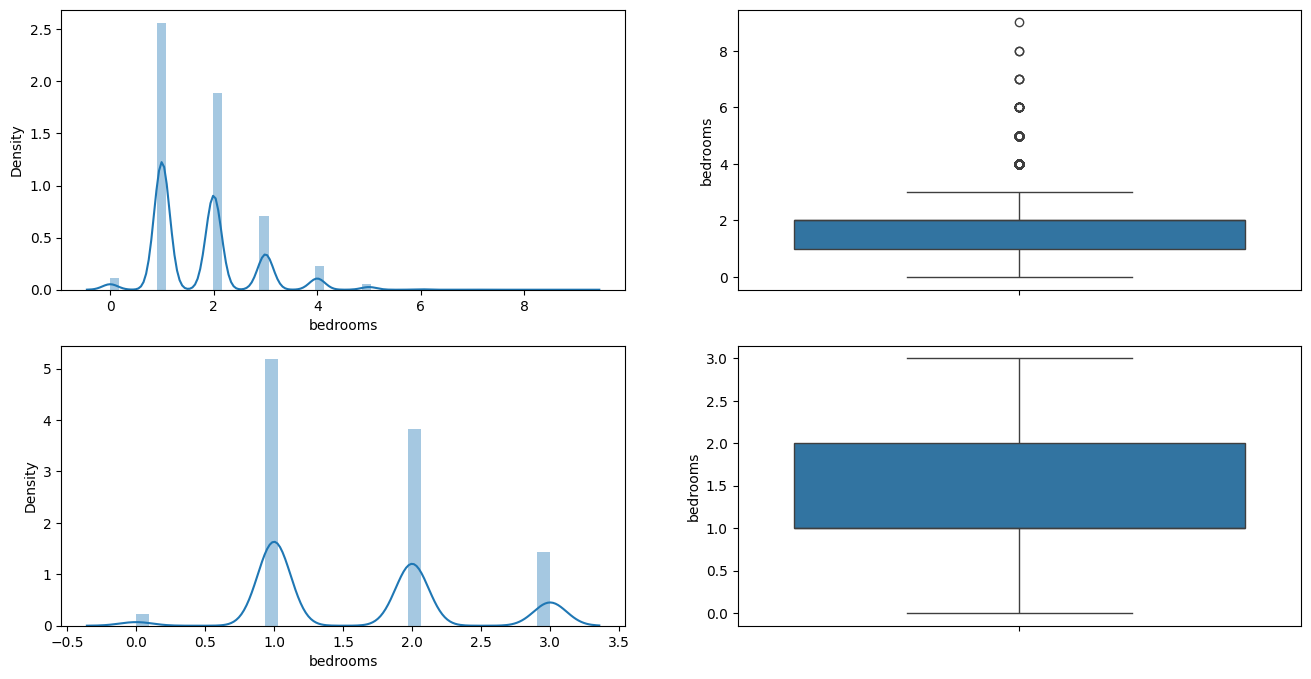

In [11]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['bedrooms'])
plt.subplot(2,2,2)
sns.boxplot(df1['bedrooms'])
plt.subplot(2,2,3)
sns.distplot(new_df['bedrooms'])
plt.subplot(2,2,4)
sns.boxplot(new_df['bedrooms'])
plt.show()

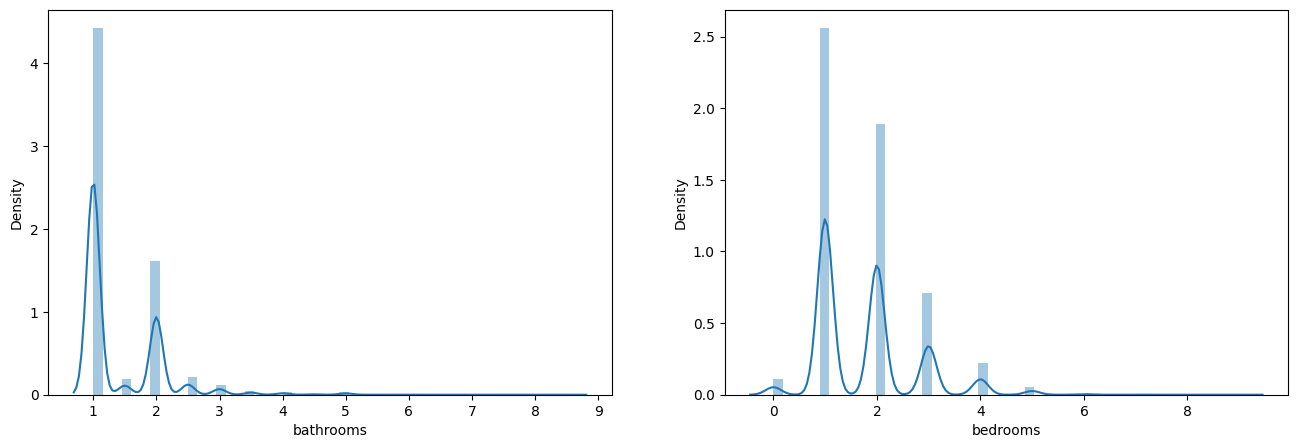

In [12]:
# plot distributions for features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['bathrooms'])
plt.subplot(1,2,2)
sns.distplot(df1['bedrooms'])
plt.show()

In [13]:
# finding boundary values for bedrooms using z-score
print("Highest allowed",df1['bedrooms'].mean() + 3*df1['bedrooms'].std())
print("Lowest allowed",df1['bedrooms'].mean() - 3*df1['bedrooms'].std())

Highest allowed 4.584156961373022
Lowest allowed -1.0915569613730225


In [14]:
# finding outliers for bedrooms
df1[(df1['bedrooms'] > 4.571) | (df1['bedrooms'] < -1.083)]

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
235,5625835116,housing/rent/apartment,A-P-T Suites Lakeland - Low Weekly & Monthly R...,A-P-T Suites is your next Extended Stay! We ha...,"Cable or Satellite,Pool,Refrigerator,Storage,TV",5.0,5,USD,No,Thumbnail,...,$275 Monthly|Weekly,Monthly|Weekly,300,5,Lakeland,FL,28.0451,-81.9689,ListedBuy,1574891000
486,5544562168,housing/rent/apartment,5115 N 40th St,all utilities included avail 12/20/19 or 1/8/2...,"Cable or Satellite,Garbage Disposal,Pool,Refri...",1.0,5,USD,No,No,...,$849,Monthly,405,5115 N 40th St,Phoenix,AZ,33.4993,-111.9838,GoSection8,1570656593
1388,5668272551,housing/rent/apartment,bedroom in Medford MA 02155,Medford Walk-In Store Front Commercial Retail ...,5,1.0,5,USD,No,Thumbnail,...,"$1,200",Monthly,550,110 Central Avenue,Medford,MA,42.4194,-71.1110,Listanza,1577312344
1790,5509258096,housing/rent/apartment,Apartment for rent in.,"Controlled Access/Gated, Laundry Facilities, A...","AC,Dishwasher,Gated,Refrigerator",1.0,5,USD,No,Thumbnail,...,"$1,800",Monthly,594,5,Pasadena,CA,34.1683,-118.1209,RentDigs.com,1568781415
6720,5668640431,housing/rent/apartment,Studio apartment 303-319 Market Street,"This unit is located at 303-319 Market Street,...",5,2.0,5,USD,No,Thumbnail,...,"$2,050",Monthly,989,303-319 Market St,San Diego,CA,32.7876,-117.1265,RentLingo,1577360384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,5668627239,housing/rent/apartment,Five BR 18605 Avenue Monaco,"This unit is located at 18605 Avenue Monaco, L...","Dishwasher,Pool,Refrigerator",5.0,5,USD,No,Thumbnail,...,"$6,900",Monthly,5700,18605 Ave,Lutz,FL,28.1253,-82.4468,RentLingo,1577359442
9994,5664597657,housing/rent/apartment,Six BR 2536 W Canyon Ridge Rd.,This unit is located at 2536 W Canyon Ridge Rd...,5,4.0,6,USD,No,Thumbnail,...,"$3,000",Monthly,5921,2536 W Canyon Ridge Road,Saint George,UT,37.0835,-113.5823,RentLingo,1577017103
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,5,4.0,5,USD,No,Thumbnail,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",5,8.0,6,USD,No,Thumbnail,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419


In [15]:
# Trimming of outliers for bedrooms
new_df1 = df1[(df1['bedrooms'] < 4.571) & (df1['bedrooms'] > -1.083)]
new_df1

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",10,5.0,0,USD,No,Thumbnail,...,$790,Monthly,101,5,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",5,5.0,1,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",5,1.0,0,USD,No,Thumbnail,...,"$1,390",Monthly,107,5,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",7,1.0,0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",9,5.0,0,USD,No,Thumbnail,...,$880,Monthly,125,5,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,5668637541,housing/rent/apartment,Four BR 6347 E. Ironwood Dr,"This unit is located at 6347 E. Ironwood Dr, S...",5,3.5,4,USD,No,Thumbnail,...,"$7,800",Monthly,4650,6347 E Ironwood Drive,Scottsdale,AZ,33.5783,-111.8902,RentLingo,1577360165
9990,5659901599,housing/rent/apartment,Four BR 864 Teakwood Rd,"This unit is located at 864 Teakwood Rd, Los A...","Dishwasher,Parking,Pool,Refrigerator",5.0,4,USD,No,Thumbnail,...,"$19,500",Monthly,5000,864 Teakwood Road,Los Angeles,CA,34.0372,-118.2972,RentLingo,1576666648
9992,5659917503,housing/rent/apartment,Four BR 17595 Burl Oak Court,"This unit is located at 17595 Burl Oak Court, ...",5,5.0,4,USD,No,Thumbnail,...,"$4,500",Monthly,5407,17595 Burl Oak CT,Eden Prairie,MN,44.8653,-93.4749,RentLingo,1576667692
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",5.0,1,USD,No,Thumbnail,...,"$4,790",Monthly,40000,5,New York,NY,40.7716,-73.9876,Listanza,1577362186


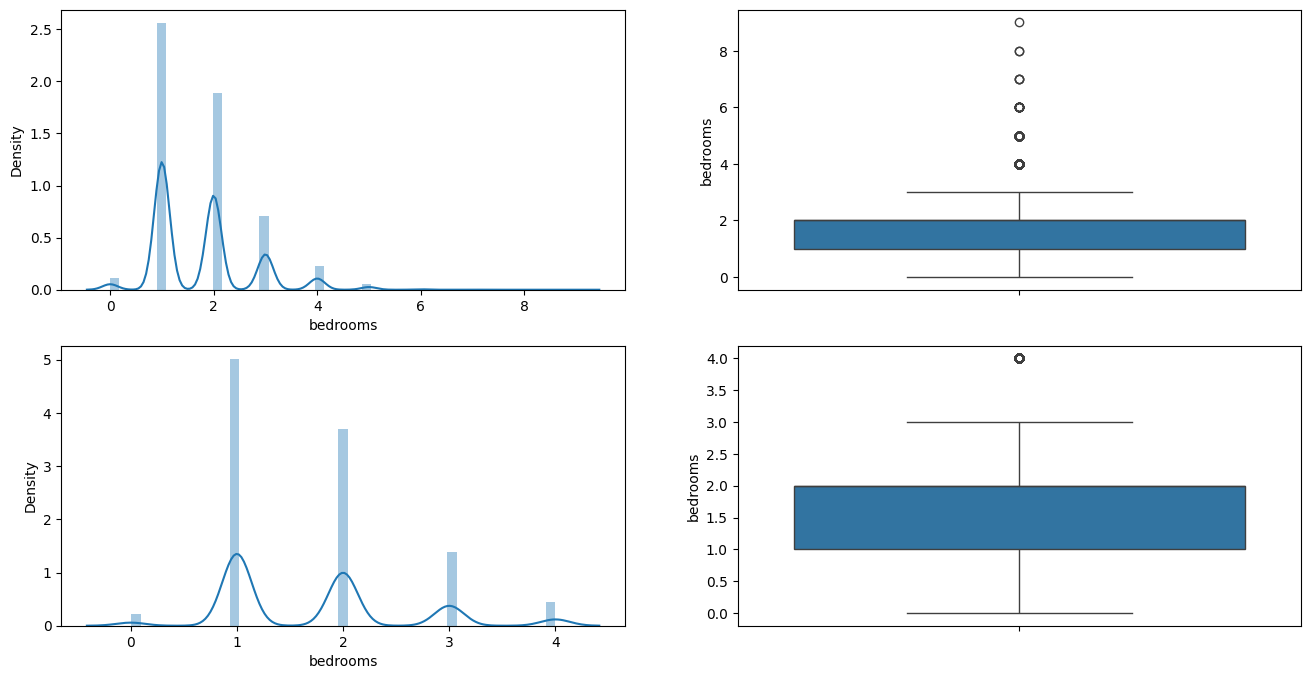

In [16]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['bedrooms'])
plt.subplot(2,2,2)
sns.boxplot(df1['bedrooms'])
plt.subplot(2,2,3)
sns.distplot(new_df1['bedrooms'])
plt.subplot(2,2,4)
sns.boxplot(new_df1['bedrooms'])
plt.show()